In [37]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
import datetime
import dateutil.parser

In [38]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [51]:
data4 = pandas.read_json("fourmetre.json")
data3 = pandas.read_json("threemetre.json")
data2 = pandas.read_json("twometre.json")
data1 = pandas.read_json("onemeter.json")

In [40]:
data3.head()

,agentId,major,minor,rssi,time,tx,uuid
0,RPi four metre,5,5,-57,2016-07-12T03:12:23.861045,-58,d0d3fa86ca7645ec9bd96af400000005
1,RPi four metre,5,5,-57,2016-07-12T03:12:25.765122,-58,d0d3fa86ca7645ec9bd96af400000005
2,RPi four metre,5,5,-86,2016-07-12T03:12:26.718932,-58,d0d3fa86ca7645ec9bd96af400000005
3,RPi four metre,5,5,-57,2016-07-12T03:12:27.669189,-58,d0d3fa86ca7645ec9bd96af400000005
4,RPi four metre,5,5,-75,2016-07-12T03:12:29.578506,-58,d0d3fa86ca7645ec9bd96af400000005


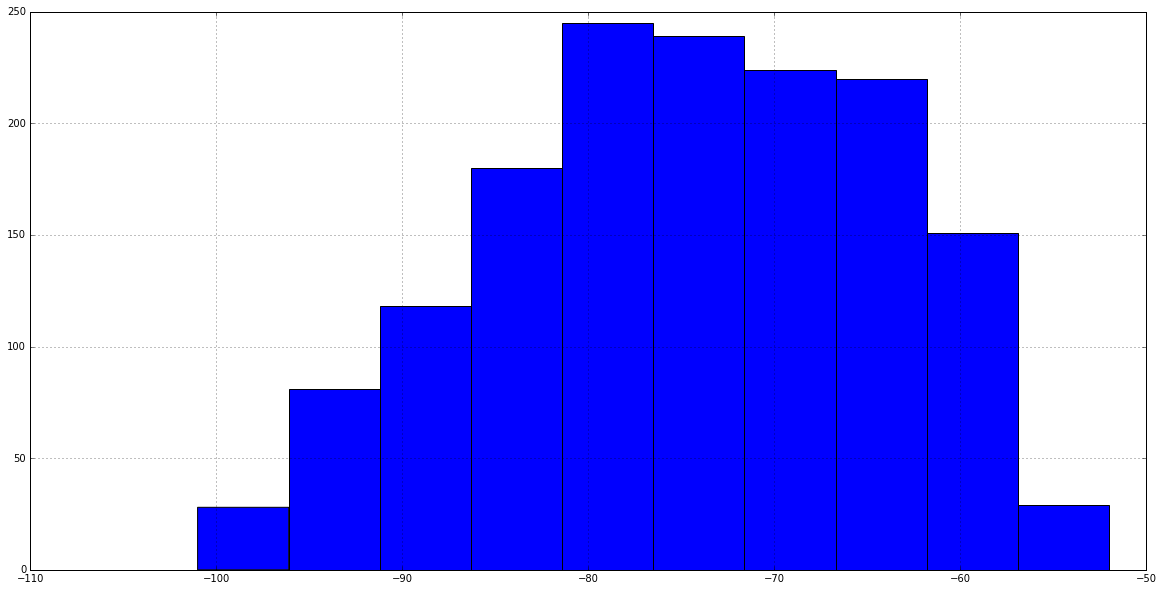

In [41]:
data3.rssi.hist()

In [52]:
def convert_timestring(row):
    return dateutil.parser.parse(row.time)


data4["timestamp"] = data4.apply (lambda row: convert_timestring(row), axis=1)
data3["timestamp"] = data3.apply (lambda row: convert_timestring(row), axis=1)
data2["timestamp"] = data2.apply (lambda row: convert_timestring(row), axis=1)
data1["timestamp"] = data1.apply (lambda row: convert_timestring(row), axis=1)

In [60]:
testRow = data3.iloc[[2]]
testRow3

,agentId,major,minor,rssi,time,tx,uuid,timestamp
2,RPi four metre,5,5,-86,2016-07-12T03:12:26.718932,-58,d0d3fa86ca7645ec9bd96af400000005,2016-07-12 03:12:26.718932


In [65]:
print testRow.timestamp
print testRow.timestamp + datetime.timedelta(minutes=1)

2   2016-07-12 03:12:26.718932
Name: timestamp, dtype: datetime64[ns]
2   2016-07-12 03:13:26.718932
Name: timestamp, dtype: datetime64[ns]


In [70]:
def addTime(row, timeoffset):
    return row.timestamp + datetime.timedelta(minutes=timeoffset)

data1["rotated_time"] = data1.apply (lambda row: addTime(row, 2), axis=1)
data2["rotated_time"] = data2.apply (lambda row: addTime(row, 1), axis=1)
data3["rotated_time"] = data3.apply (lambda row: addTime(row, 0), axis=1)
data4["rotated_time"] = data4.apply (lambda row: addTime(row, 3), axis=1)

In [67]:
data2.head()

,agentId,major,minor,rssi,time,tx,uuid,timestamp,rotated_time
0,RPi two metre,5,5,-71,2016-07-12T03:12:21.875394,-58,d0d3fa86ca7645ec9bd96af400000005,2016-07-12 03:12:21.875394,2016-07-12 03:13:21.875394
1,RPi two metre,5,5,-80,2016-07-12T03:12:22.829368,-58,d0d3fa86ca7645ec9bd96af400000005,2016-07-12 03:12:22.829368,2016-07-12 03:13:22.829368
2,RPi two metre,9752,43912,-87,2016-07-12T03:12:22.980374,-65,d0d3fa86ca7645ec9bd96af4022e7550,2016-07-12 03:12:22.980374,2016-07-12 03:13:22.980374
3,RPi two metre,5,5,-85,2016-07-12T03:12:23.783425,-58,d0d3fa86ca7645ec9bd96af400000005,2016-07-12 03:12:23.783425,2016-07-12 03:13:23.783425
4,RPi two metre,5,5,-73,2016-07-12T03:12:25.683649,-58,d0d3fa86ca7645ec9bd96af400000005,2016-07-12 03:12:25.683649,2016-07-12 03:13:25.683649


In [43]:
print data4.timestamp[0]
print type(data4.timestamp[0])

2016-07-12 03:12:23.861045
<class 'pandas.tslib.Timestamp'>


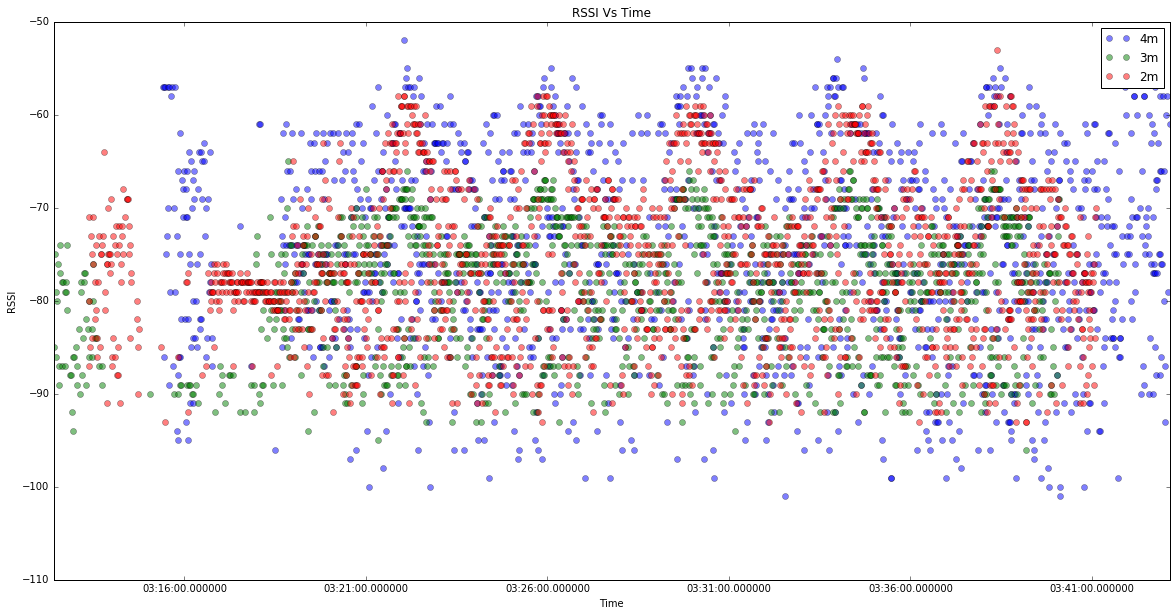

In [72]:
plt.plot_date(data4.rotated_time, data4.rssi, label='4m', alpha=0.5)
plt.plot_date(data3.rotated_time, data3.rssi, label='3m', alpha=0.5)
plt.plot_date(data2.rotated_time, data2.rssi, label='2m', alpha=0.5)
plt.plot_data(data1.rotated_time, data1.rssi, label='1m', alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time')
plt.show()

In [45]:
#create unique list of names
uniqueNames = data4.major.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pandas.DataFrame for elem in uniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data4[:][data4.major == key] 
    
print uniqueNames
print DataFrameDict[5].shape
print DataFrameDict[9752].shape

[    5  9752 60467]
(1110, 8)
(395, 8)


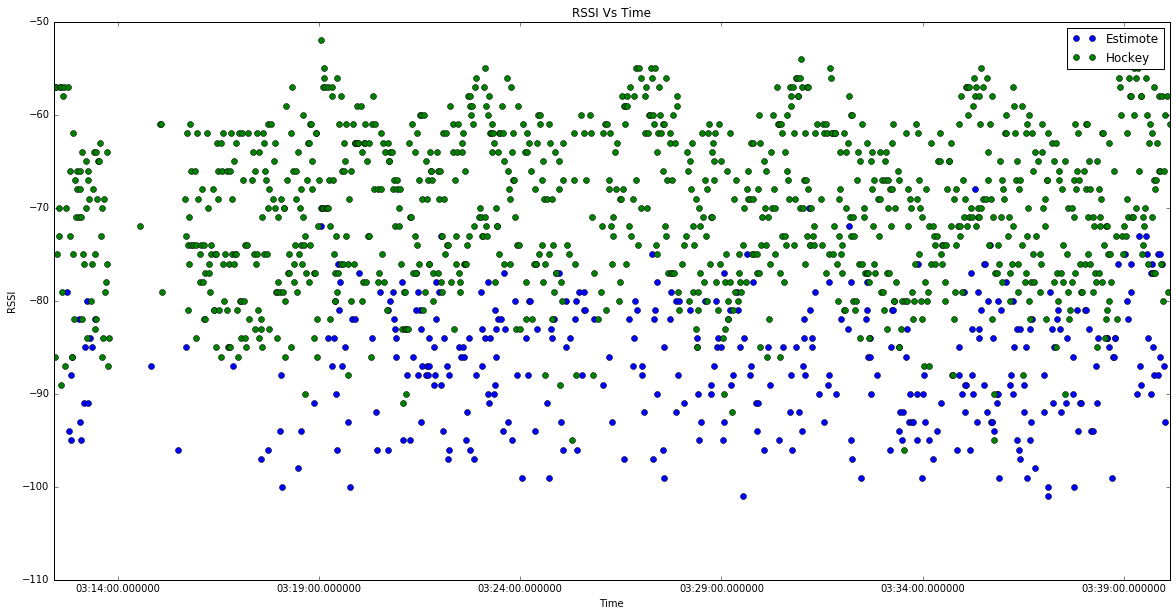

In [46]:
hockey = DataFrameDict[5]
estimote = DataFrameDict[9752]
plt.plot_date(estimote.timestamp, estimote.rssi, label='Estimote')
plt.plot_date(hockey.timestamp, hockey.rssi, label='Hockey')
plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI Vs Time')
plt.legend()
plt.show()